In [11]:
#Notes:-
#Anaemia : 0 means that the person does not have anaemia, if 1 it does.

#Diabetes : 0 means that the person does not have diabetes, if 1 it does.

#High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

#Smoking : 0 means that the person does not smoke, if 1 it smokes.

#Sex : 0 for female, 1 for male.

#DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

In [12]:
### import basic libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")               ### dataset loading

In [14]:
### dataset analyzing
for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head())
    print("DESCRIBE:")            
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(299, 13)
COLUMNS:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
HEAD:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3 

In [15]:
df.isnull().sum()                                                    ### null values checking

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
#Note : the dataset does not contain null values

<AxesSubplot:>

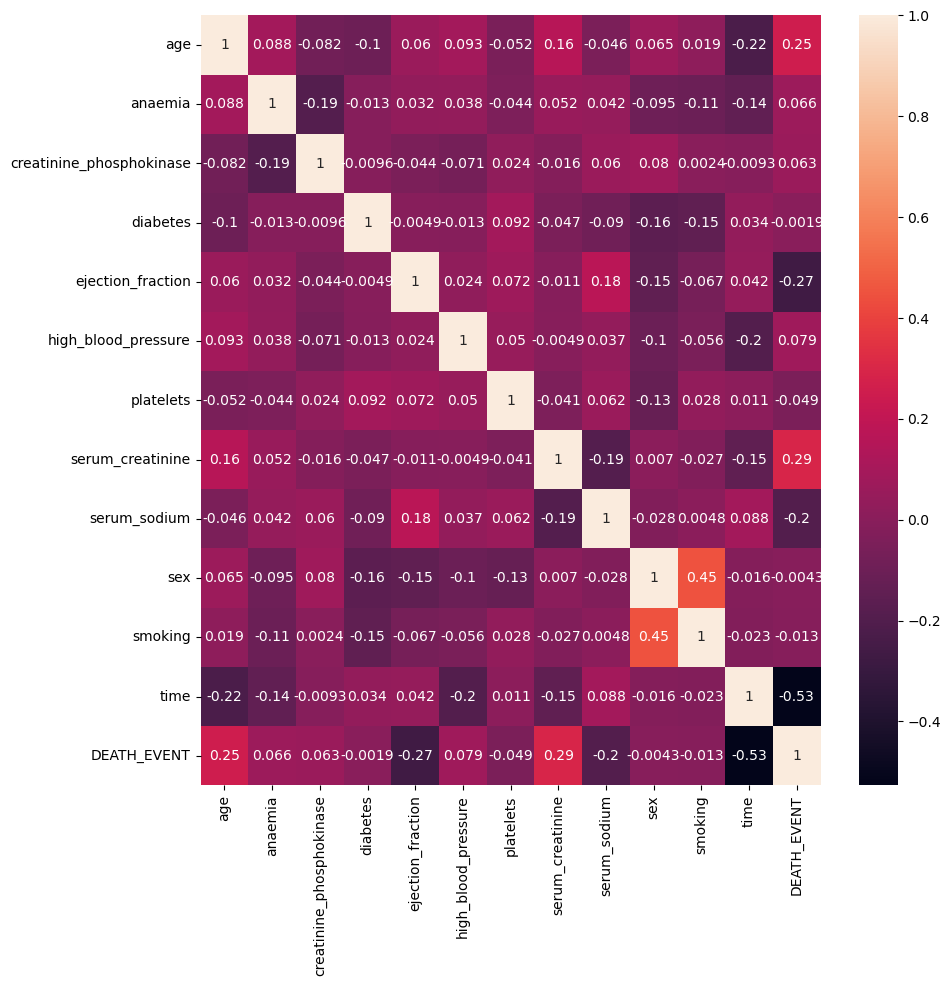

In [17]:
### data visualization(feature selection)
              
plt.figure(figsize=(10,10))                                          #heatmap(correlation map)                                                                          
sns.heatmap(df.corr(), annot=True) 

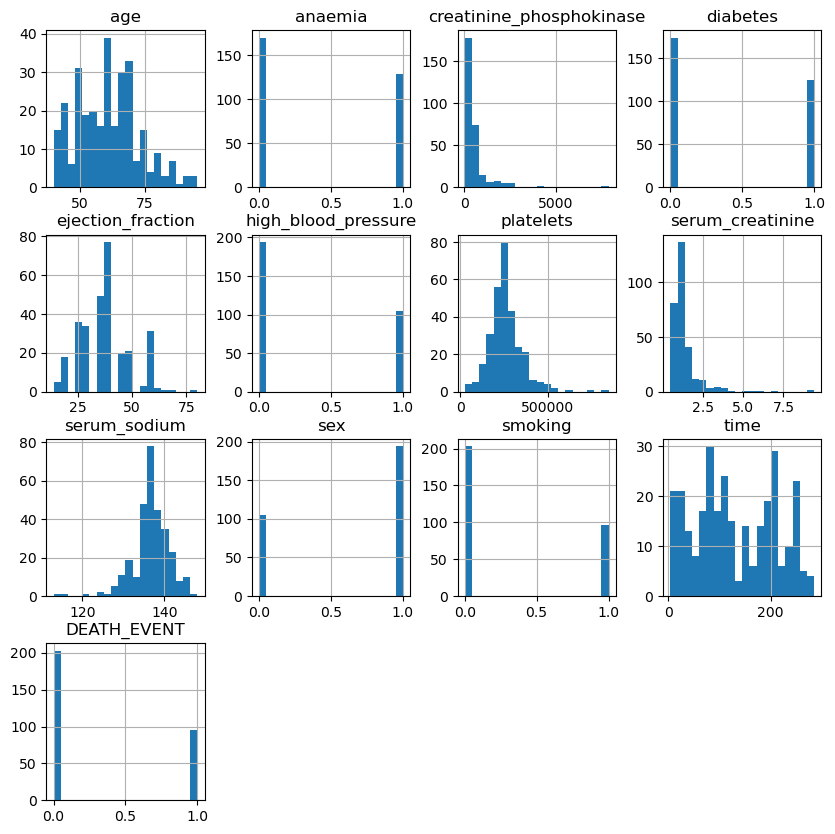

In [18]:
df.hist(bins=20, figsize=(10,10))             
plt.show()                              

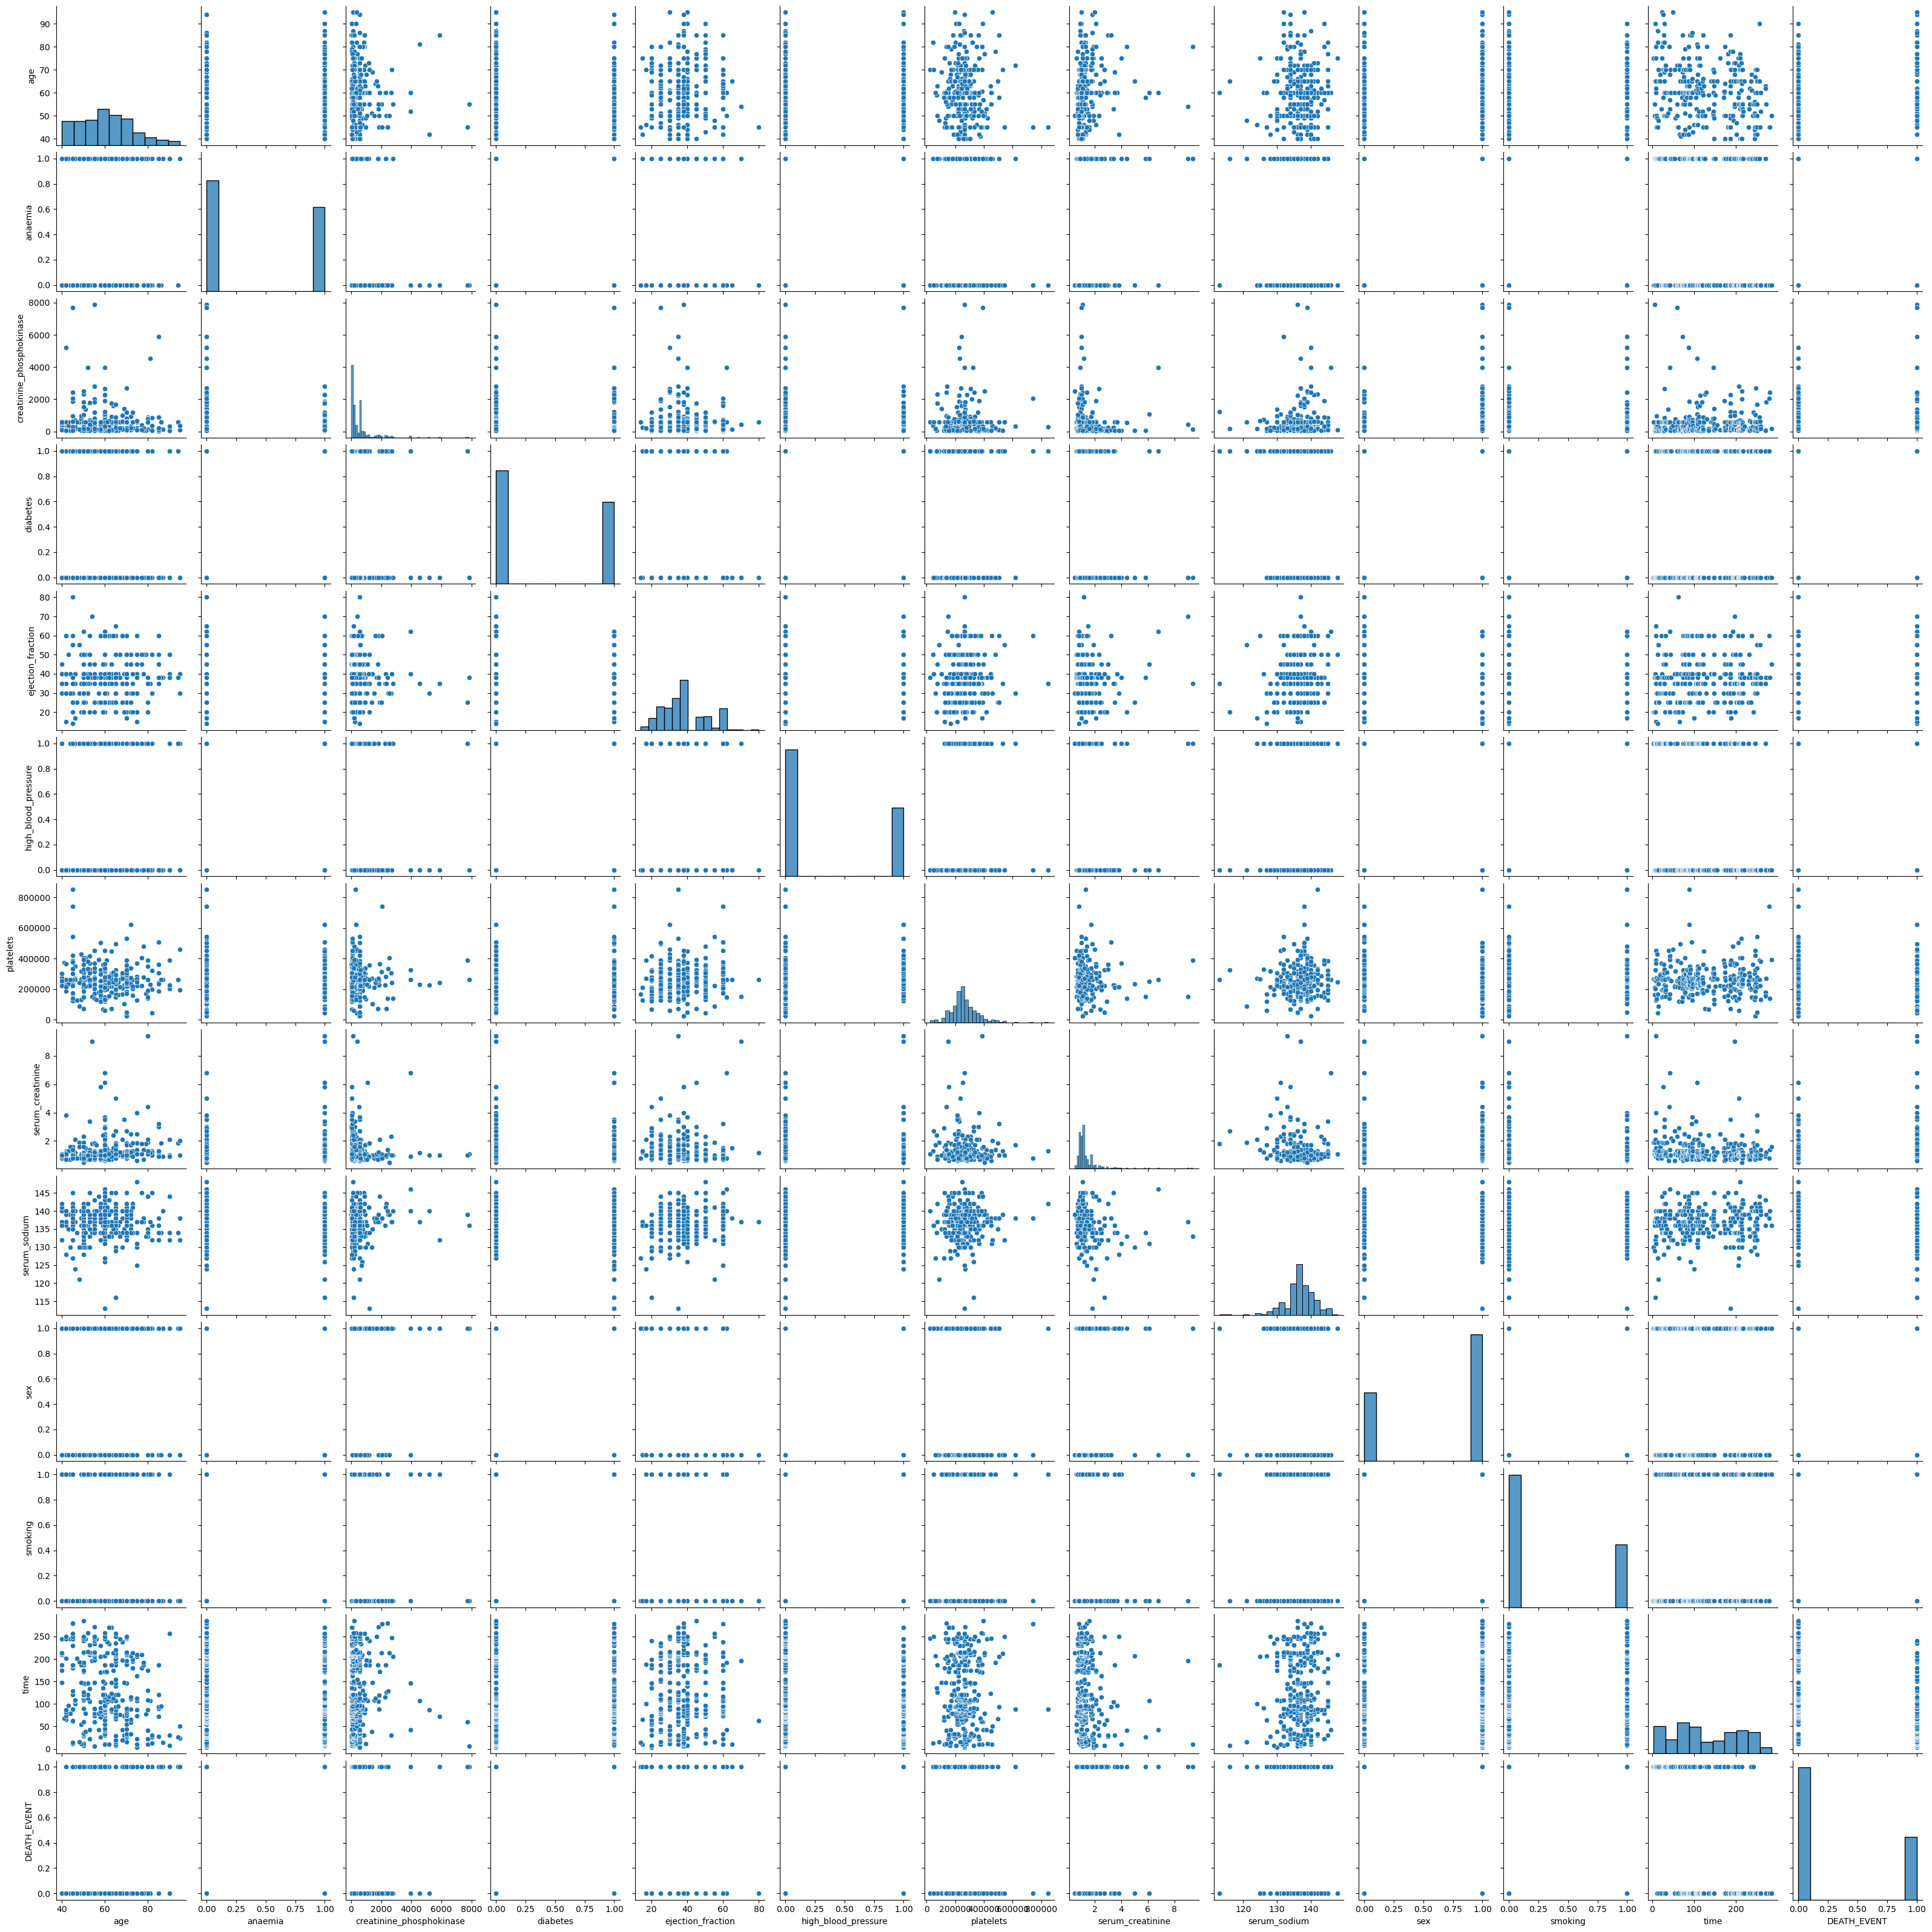

In [19]:
sns.pairplot(df)                                                             #pairplot

In [20]:
#countplot = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]                                                
#histplot = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]        

<AxesSubplot:xlabel='anaemia', ylabel='count'>

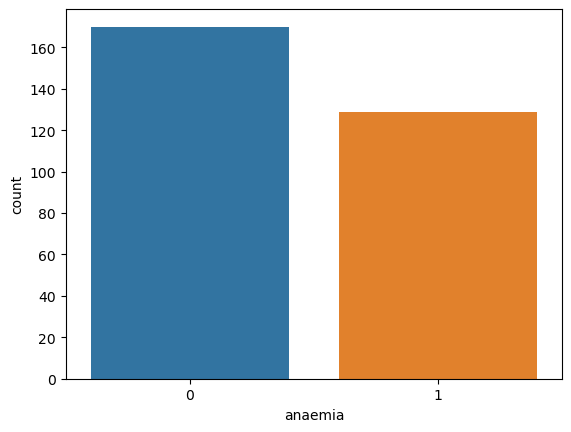

In [21]:
#countplot
sns.countplot(x="anaemia",data = df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

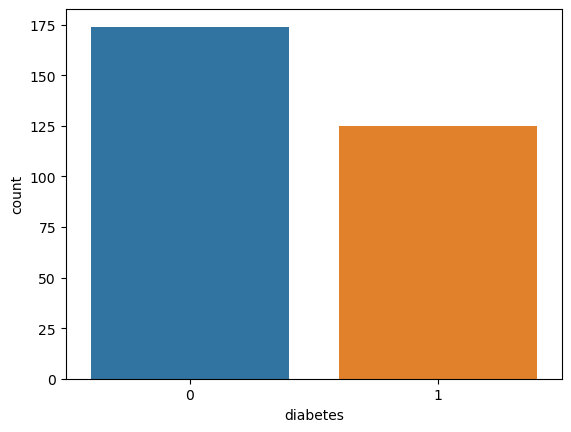

In [22]:
sns.countplot(x="diabetes",data = df)                                      

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

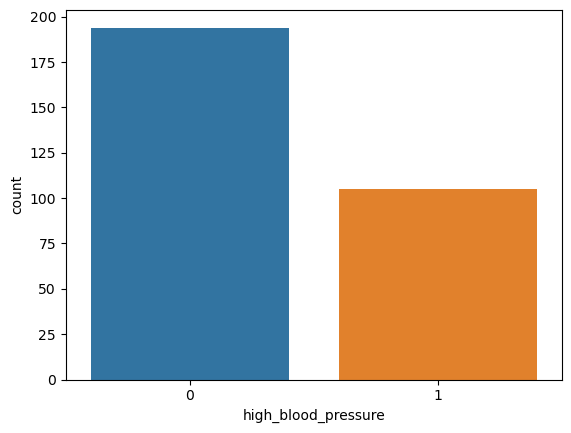

In [23]:
sns.countplot(x="high_blood_pressure",data = df)              

<AxesSubplot:xlabel='sex', ylabel='count'>

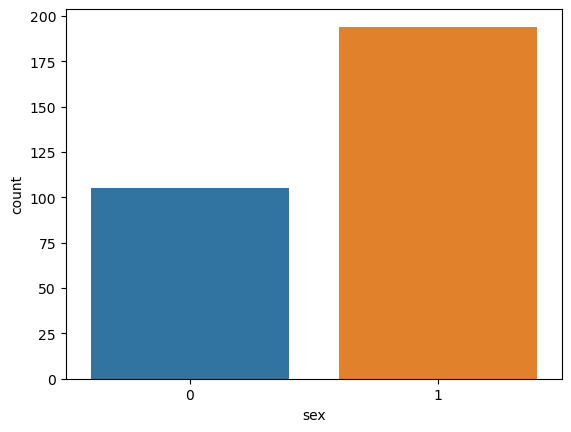

In [24]:
sns.countplot(x="sex",data = df) 

<AxesSubplot:xlabel='smoking', ylabel='count'>

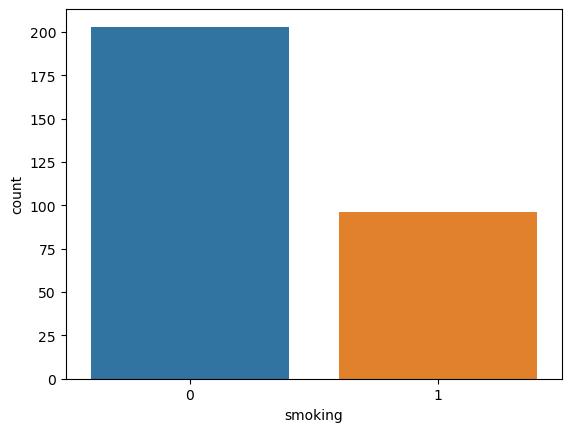

In [25]:
sns.countplot(x="smoking",data = df) 

<AxesSubplot:xlabel='age', ylabel='Count'>

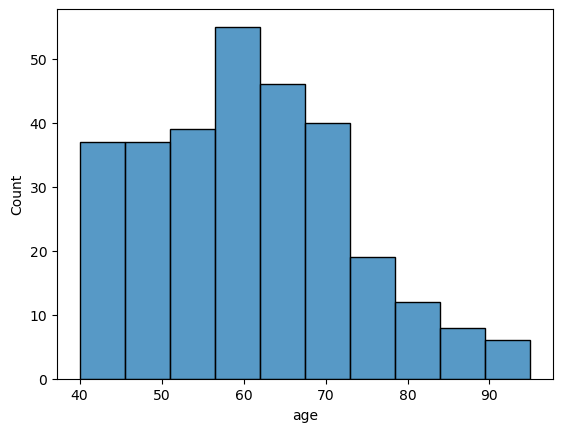

In [26]:
#histplot
sns.histplot(x="age",data = df)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

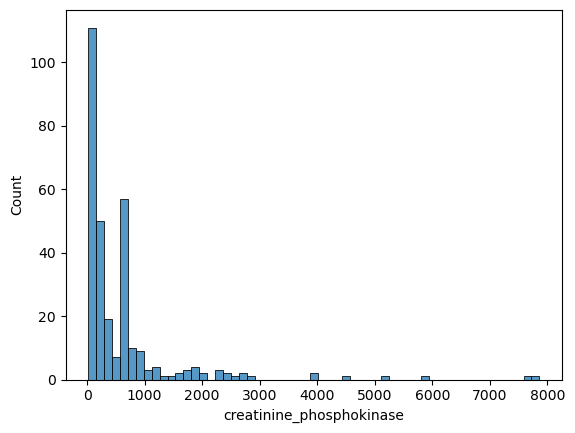

In [27]:
sns.histplot(x="creatinine_phosphokinase",data = df)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

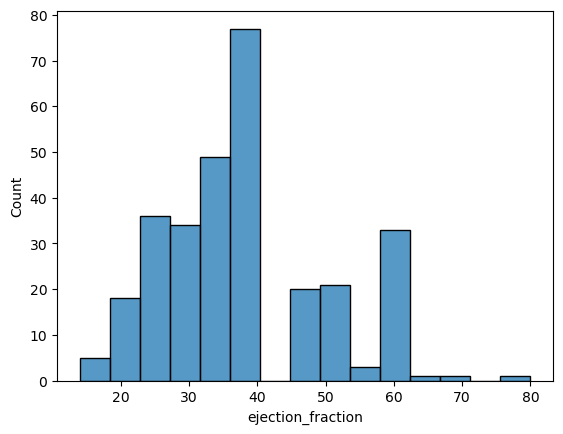

In [28]:
sns.histplot(x="ejection_fraction",data = df)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

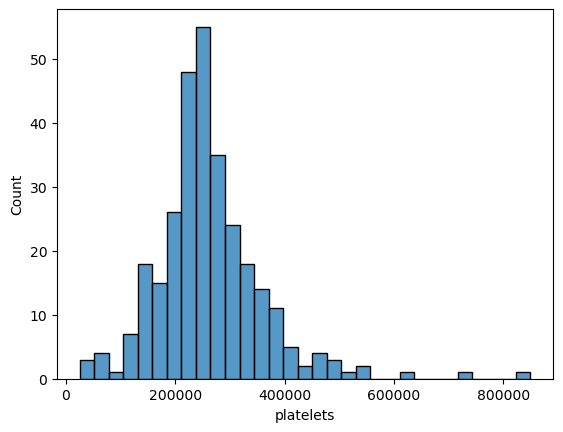

In [29]:
sns.histplot(x="platelets",data = df)

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

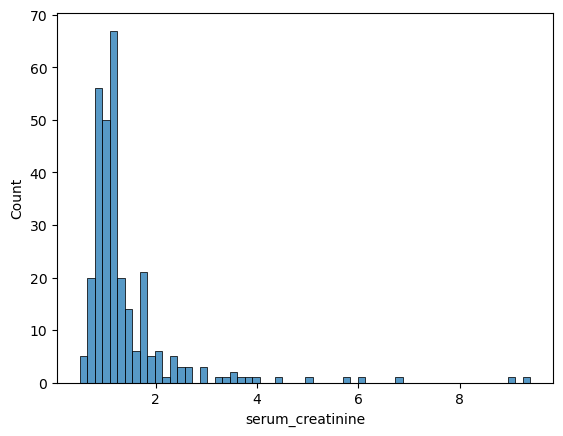

In [30]:
sns.histplot(x="serum_creatinine",data = df)

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

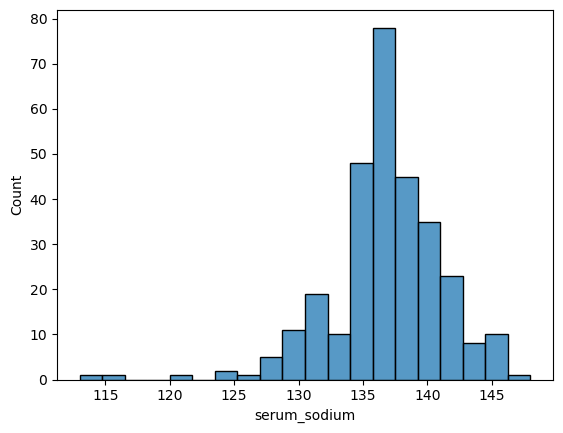

In [31]:
sns.histplot(x="serum_sodium",data = df)

<AxesSubplot:xlabel='time', ylabel='Count'>

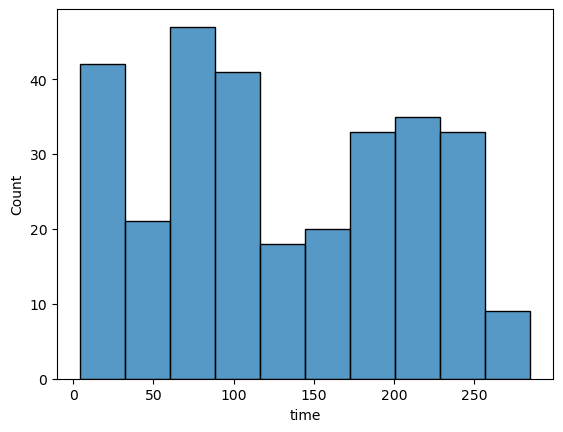

In [32]:
sns.histplot(x="time",data = df)

In [33]:
### feature(x) & label(y)
y=df["DEATH_EVENT"]
x=df.drop(["DEATH_EVENT"],axis=1) 

In [34]:
### traintestsplit
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [35]:
### score & algorithms
#SCORE
from sklearn.metrics import accuracy_score
# CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression          #1         
from sklearn.svm import SVC                                  #2
from sklearn.tree import DecisionTreeClassifier              #3
from sklearn.naive_bayes import GaussianNB                   #4
from sklearn.ensemble import RandomForestClassifier          #5
#from sklearn.neighbors import KNeighborsClassifier           #6

In [36]:
#1 Logistic Regression
LRM = LogisticRegression()                                                     
LRM.fit(xtrain, ytrain)                         #model training(learner)
LRM_PRED = LRM.predict(xtest)                   #model evaluation(predictor)

LR_accu = accuracy_score(LRM_PRED, ytest) 
print("Logistic Accuracy Score: ","{:.2f}%".format(100*LR_accu))  

Logistic Accuracy Score:  85.56%


In [37]:
#2 Support Vector Machine
SVM = SVC()                                                             
SVM.fit(xtrain, ytrain)
SVM_PRED = SVM.predict(xtest)

SVM_accu = accuracy_score(SVM_PRED, ytest)
print("Support Vector Machine Accuracy Score: ","{:.2f}%".format(100*SVM_accu))                

Support Vector Machine Accuracy Score:  73.33%


In [38]:
#3 Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2)         
DTCM.fit(xtrain, ytrain)
DTCM_pred = DTCM.predict(xtest)

DTCM_accu = accuracy_score(DTCM_pred, ytest)
print("Decison Tree Classifier Accuracy Score: ","{:.2f}%".format(100*DTCM_accu))

Decison Tree Classifier Accuracy Score:  88.89%


In [39]:
#4 Naive Bayes
NBM = GaussianNB()                                                         
NBM.fit(xtrain, ytrain)
NBM_pred = NBM.predict(xtest)

NBM_accu = accuracy_score(NBM_pred, ytest)
print("Naive Bayes Accuracy Score: ","{:.2f}%".format(100*NBM_accu))

Naive Bayes Accuracy Score:  85.56%


In [41]:
#5 Random Forest Classifier
RFM = RandomForestClassifier()                                          
RFM.fit(xtrain, ytrain)
RFM_pred = RFM.predict(xtest)

RFM_accu = accuracy_score(RFM_pred, ytest)
print("Random Forest Classifier Accuracy Score: ","{:.2f}%".format(100*RFM_accu))

Random Forest Classifier Accuracy Score:  92.22%


In [42]:
#1. Logistic Accuracy Score:  85.56%
#2. Support Vector Machine Accuracy Score:  73.33%
#3. Decison Tree Classifier Accuracy Score:  88.89%
#4. Naive Bayes Accuracy Score:  85.56%
#5. Random Forest Classifier Accuracy Score:  92.22%

In [44]:
## we are using to predict Random Forest Classifier for higher accuracy.

In [46]:
##Predictive System 
A = (65,1,52,0,25,1,276000,1.3,137,0,0,16)

B = np.asarray(A)                                         # NUMPY ARRAY

C = B.reshape(1,-1)                                       # RESHAPE

prediction = RFM.predict(C)
print(prediction)         

[1]


In [47]:
#DEATH_EVENT - 1 ,(1 means heart failure is  the cause of the death)

In [48]:
##Predictive System 
A = (75,0,582,0,20,1,265000,1.9,130,1,0,4)

B = np.asarray(A)                                         # NUMPY ARRAY

C = B.reshape(1,-1)                                       # RESHAPE

prediction = RFM.predict(C)
print(prediction)          

[1]


In [49]:
#DEATH_EVENT - 1 ,(1 means heart failure is  the cause of the death)